In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import welly
import os
env = %env
from welly import Well
import lasio

In [2]:
import os
home_path = os.getcwd()
print(home_path)

D:\Users\drome\gitrepos\spe 06\MannvilleGroup_Strat_Hackathon


In [3]:
# D:\Users\drome\gitrepos\spe 06\MannvilleGroup_Strat_Hackathon\ds_extnd.csv
# D:\Users\drome\gitrepos\spe 06\MannvilleGroup_Strat_Hackathon\SPE_006_originalData\OilSandsDB\Logs\00-01-01-073-05W5-0.LAS
# D:\Users\drome\gitrepos\spe 06\MannvilleGroup_Strat_Hackathon\SPE_006_originalData\OilSandsDB\WELLS.TXT

In [4]:
wells = pd.read_csv(filepath_or_buffer=home_path + "/SPE_006_originalData/OilSandsDB/WELLS.TXT", delimiter="\t")
cols = ['SitID', 'UWI']
wells = wells[cols]
wells['UWI_'] = wells.UWI.str.replace('/', '-')


In [5]:
wells.set_index(wells.UWI, inplace=True)
wells = wells.drop('UWI', axis=1)
wells.head()

,SitID,UWI_
UWI,,
00/12-08-067-01W4/0,102496,00-12-08-067-01W4-0
00/07-08-067-02W4/0,102497,00-07-08-067-02W4-0
00/09-11-067-02W4/0,102498,00-09-11-067-02W4-0
00/10-29-067-02W4/0,102500,00-10-29-067-02W4-0
00/06-34-067-02W4/0,102501,00-06-34-067-02W4-0


In [6]:
wells.loc['00/12-08-067-01W4/0'].SitID, wells.iloc[0].UWI_

(102496, '00-12-08-067-01W4-0')

In [7]:
wells.loc['00/12-08-067-01W4/0'].UWI_

'00-12-08-067-01W4-0'

In [8]:
wells.index

Index(['00/12-08-067-01W4/0', '00/07-08-067-02W4/0', '00/09-11-067-02W4/0',
       '00/10-29-067-02W4/0', '00/06-34-067-02W4/0', '00/11-04-067-03W4/0',
       '00/10-08-067-03W4/0', '00/10-14-067-03W4/0', '00/10-28-067-03W4/0',
       '00/07-36-067-03W4/0',
       ...
       'AA/06-31-101-12W4/0', 'AA/01-05-101-13W4/0', 'AA/15-14-101-13W4/0',
       'AA/16-17-101-13W4/0', 'AA/11-27-101-13W4/0', 'AA/11-30-101-13W4/0',
       'AA/11-08-101-14W4/0', 'AA/14-14-101-14W4/0', 'AA/06-29-101-14W4/0',
       'AA/06-35-101-14W4/0'],
      dtype='object', name='UWI', length=2193)

In [9]:
wells.head()

,SitID,UWI_
UWI,,
00/12-08-067-01W4/0,102496,00-12-08-067-01W4-0
00/07-08-067-02W4/0,102497,00-07-08-067-02W4-0
00/09-11-067-02W4/0,102498,00-09-11-067-02W4-0
00/10-29-067-02W4/0,102500,00-10-29-067-02W4-0
00/06-34-067-02W4/0,102501,00-06-34-067-02W4-0


In [10]:
ds = pd.read_csv(filepath_or_buffer=home_path + "/ds_extnd.csv")
ds.head()

,SitID,HorID,lng,lat,SitID1,SitID2,SitID3,SitID4,SitID5,SitID6,...,SitID11,SitID12,SitID13,SitID14,SitID15,SitID16,SitID17,SitID18,SitID19,SitID20
0,142218,1000,-114.620656,55.288691,142140,108294,108229,108245,163925,163923,...,108236,142123,107548,107467,108911,108889,108915,107456,183487,106840
1,142218,4000,-114.620656,55.288691,142140,108225,108294,108229,108245,163925,...,108236,142123,107548,107467,108911,108889,108915,107456,183487,106840
2,142218,5000,-114.620656,55.288691,142140,108225,108294,108229,108245,163925,...,106841,108236,142123,107467,108911,108889,108915,107456,183487,106840
3,142218,7000,-114.620656,55.288691,142140,108225,108294,108229,108245,163925,...,106841,108236,142123,107548,107467,108911,108889,108915,107456,183487
4,142218,11000,-114.620656,55.288691,108225,108294,108229,163925,163923,108306,...,105987,105984,108207,109402,107468,108206,108872,105963,110057,178196


In [11]:
wells.query('SitID == 102496').index.values

array(['00/12-08-067-01W4/0'], dtype=object)

In [12]:
ds[ds.SitID == 102496]

,SitID,HorID,lng,lat,SitID1,SitID2,SitID3,SitID4,SitID5,SitID6,...,SitID11,SitID12,SitID13,SitID14,SitID15,SitID16,SitID17,SitID18,SitID19,SitID20
7036,102496,1000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7037,102496,5000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7038,102496,7000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7039,102496,9000,-110.12932,54.785907,102498,102501,102497,102500,103699,102517,...,102503,103711,102505,103707,103713,153272,102577,102518,103715,106445
7040,102496,9500,-110.12932,54.785907,102498,102501,102497,102500,103699,102517,...,102503,103711,102505,103707,103713,153272,102577,102518,103715,106445
7041,102496,10000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7042,102496,11000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7043,102496,12000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7044,102496,13000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7045,102496,14000,-110.12932,54.785907,102498,103698,103700,102501,102497,103703,...,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272


In [13]:
ds.SitID = ds.SitID.values.astype('int64')

In [14]:
sites_id_cols = ['SitID1', 'SitID2', 'SitID3', 'SitID4', 'SitID5', 'SitID6', 'SitID7', 'SitID8', 'SitID9', 'SitID10', 
         'SitID11', 'SitID12', 'SitID13', 'SitID14', 'SitID15', 'SitID16', 'SitID17', 'SitID18', 'SitID19', 'SitID20']
ds[ds.SitID == 102496].columns.values

array(['SitID', 'HorID', 'lng', 'lat', 'SitID1', 'SitID2', 'SitID3',
       'SitID4', 'SitID5', 'SitID6', 'SitID7', 'SitID8', 'SitID9',
       'SitID10', 'SitID11', 'SitID12', 'SitID13', 'SitID14', 'SitID15',
       'SitID16', 'SitID17', 'SitID18', 'SitID19', 'SitID20'],
      dtype=object)

In [15]:
pd.DataFrame(ds[ds.SitID == 102496], columns=sites_id_cols[0:])

,SitID1,SitID2,SitID3,SitID4,SitID5,SitID6,SitID7,SitID8,SitID9,SitID10,SitID11,SitID12,SitID13,SitID14,SitID15,SitID16,SitID17,SitID18,SitID19,SitID20
7036,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7037,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7038,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7039,102498,102501,102497,102500,103699,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272,102577,102518,103715,106445
7040,102498,102501,102497,102500,103699,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272,102577,102518,103715,106445
7041,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7042,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7043,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7044,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272
7045,102498,103698,103700,102501,102497,103703,102500,103699,103704,102517,102507,103710,153271,102514,102503,103711,102505,103707,103713,153272


In [17]:
sid = 102496
# get SitIDs of neighbor wells based on current SitID
def get_sids(sid, sites_id_cols):
    df = pd.DataFrame(ds[ds.SitID == sid], columns=sites_id_cols[0:])
    l = []
    for index, row in df.iterrows():
        l.extend(row[sites_id_cols[0:]].values.tolist())
    s = set(l)
    l2 = list(s)
    return l2

In [37]:
l2 = get_sids(102496, sites_id_cols)
print((type(l2), l2, len(l2)))

(<class 'list'>, [103698, 103699, 103700, 103703, 103704, 103707, 103710, 103711, 103713, 103715, 102577, 153271, 153272, 106445, 102497, 102498, 102500, 102501, 102503, 102505, 102507, 102514, 102517, 102518], 24)


In [19]:
sitIDs = ds.SitID.unique()[:3] # set of unique SitIDs for testing
sitIDs, type(ds), type(wells)

(array([142218, 144992, 153654], dtype=int64),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [28]:
#  welly/tutorial/Project.ipynb

In [20]:
from welly import Project

In [21]:
!ls *.LAS

scratch.las


In [31]:
# os.listdir("./SPE_006_originalData/OilSandsDB/Logs/")
# os.getcwd()

In [22]:
p = Project.from_las("./SPE_006_originalData/OilSandsDB/Logs/*.LAS")

1595it [01:09, 22.90it/s]Header section Parameter regexp=~P was not found.
2171it [01:30, 24.02it/s]


In [23]:
len(p)

2171

In [88]:
p[:10]

Index,UWI,Data,Curves
0,00/01-01-073-05W5/0,5 curves,"DPHI, NPHI, GR, CALI, ILD"
1,00/01-01-095-19W4/0,5 curves,"GR, CALI, NPHI, DPHI, ILD"
2,00/01-03-085-15W400,4 curves,"DPHI, NPHI, GR, ILD"
3,00/01-04-075-23W4/0,5 curves,"ILD, NPHI, DPHI, GR, CALI"
4,00/01-05-085-15W400,4 curves,"GR, NPHI, DPHI, ILD"
5,00/01-08-080-21W4/0,4 curves,"ILD, NPHI, DPHI, GR"
6,00/01-09-080-13W4/0,4 curves,"GR, NPHI, DPHI, ILD"
7,00/01-10-078-26W4/0,5 curves,"GR, ILD, NPHI, DPHI, CALI"
8,00/01-11-082-23W4/0,5 curves,"GR, CALI, NPHI, DPHI, ILD"
9,00/01-12-079-14W4/0,4 curves,"ILD, DPHI, NPHI, GR"


In [149]:
def format_uwi(uwi):
    import re
    # Match incorrect uwi format.
    m = re.compile("^(.{17})(\d{1})(\d{1})$")
    if m.match(uwi):
        return (m.match(uwi)[1] + "/" + m.match(uwi)[3])
    return(uwi)
    

In [150]:
format_uwi(p[1].header.uwi)

'00/01-01-095-19W4/0'

In [151]:
format_uwi(p[4].header.uwi)

'00/01-05-085-15W4/0'

In [157]:
# fix uwi's
for i in range(len(p)):
    try:
        p[i].header.uwi = format_uwi(p[i].header.uwi)
    except:
        continue

In [161]:
p[:10]

Index,UWI,Data,Curves
0,00/01-01-073-05W5/0,5 curves,"DPHI, NPHI, GR, CALI, ILD"
1,00/01-01-095-19W4/0,5 curves,"GR, CALI, NPHI, DPHI, ILD"
2,00/01-03-085-15W4/0,4 curves,"DPHI, NPHI, GR, ILD"
3,00/01-04-075-23W4/0,5 curves,"ILD, NPHI, DPHI, GR, CALI"
4,00/01-05-085-15W4/0,4 curves,"GR, NPHI, DPHI, ILD"
5,00/01-08-080-21W4/0,4 curves,"ILD, NPHI, DPHI, GR"
6,00/01-09-080-13W4/0,4 curves,"GR, NPHI, DPHI, ILD"
7,00/01-10-078-26W4/0,5 curves,"GR, ILD, NPHI, DPHI, CALI"
8,00/01-11-082-23W4/0,5 curves,"GR, CALI, NPHI, DPHI, ILD"
9,00/01-12-079-14W4/0,4 curves,"ILD, DPHI, NPHI, GR"


In [25]:
p[0].data['GR'].start, p[0].data['GR'].stop

(390.0, 650.25)

In [26]:
p[0].header.uwi

'00/01-01-073-05W5/0'

In [27]:
from striplog import Legend, Striplog
legend = Legend.builtin('NSDOE')
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
alias = {'GR': ['GR', 'GRC', 'NGT'], 'TVD': ['TD', 'TVD']}

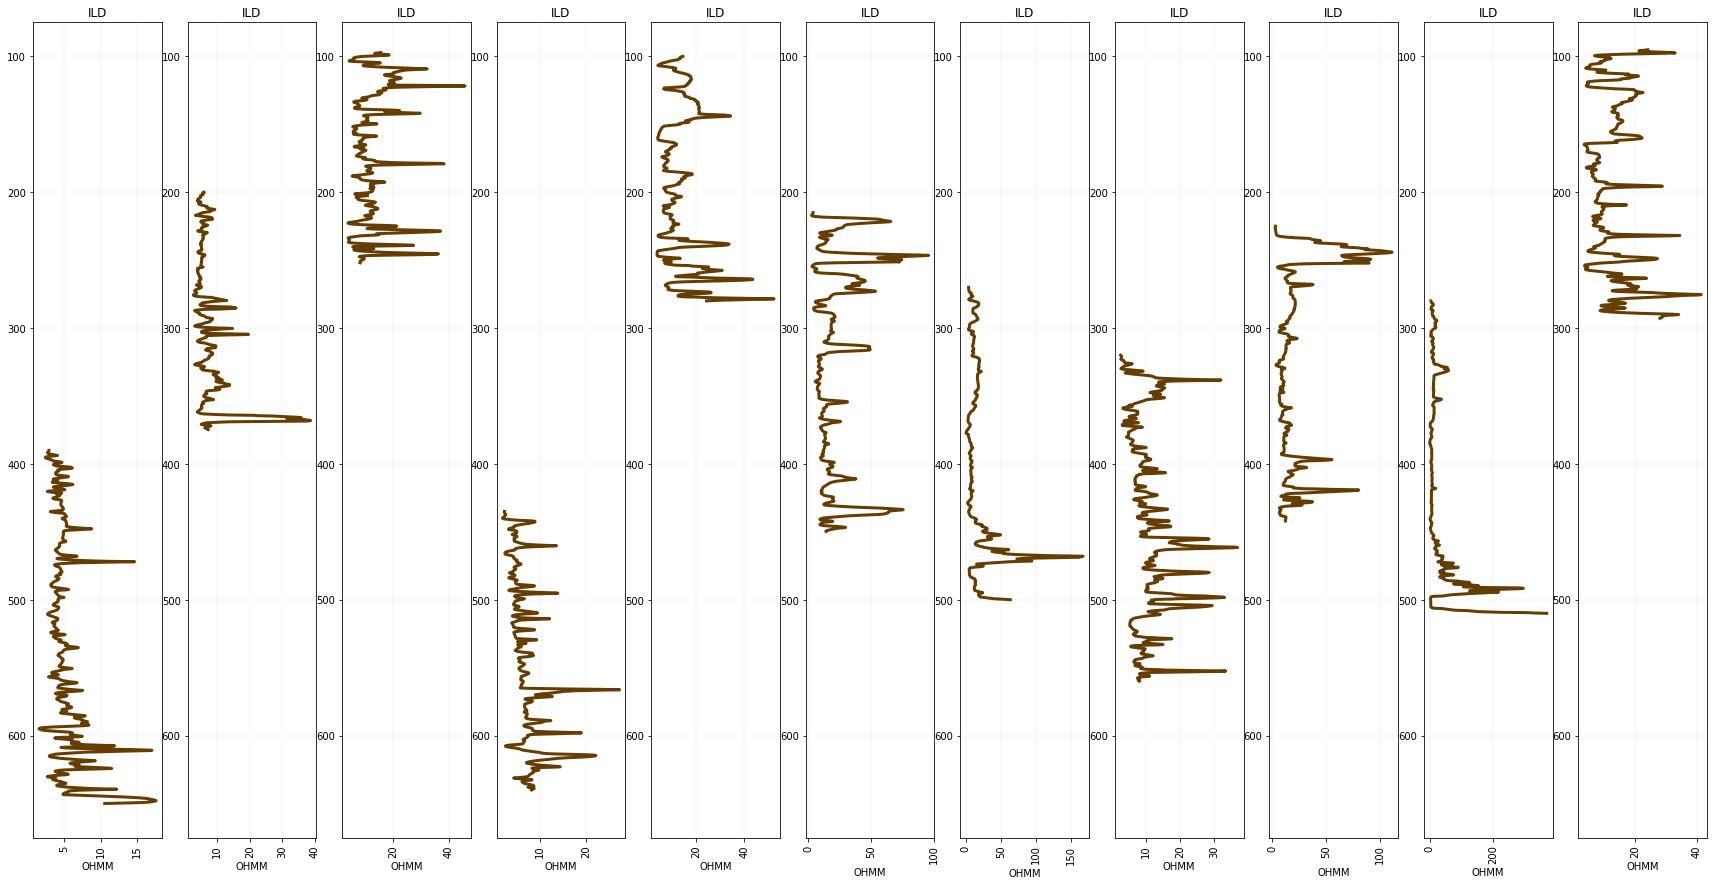

In [107]:
# #ff0000,2.0,linear,GR
# #006400,3.0,linear,ILD
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#663d00,2.0,linear,GR
#000000,2.0,log,NPHI
#00ff00,2.0,linear,DPHI
#663d00,3.0,linear,ILD
"""
curve_legend = Legend.from_csv(text=curve_legend_csv)

complete_legend = legend + curve_legend
complete_legend[:11]

fig, axs = plt.subplots(figsize=(30, 15), ncols=11)
hx_line = [500, 340, 220, 550, 250, 350, 400, 450, 325, 400]

for i, w in enumerate(p[:11]):
    ax = axs[i]
    gr = w.get_curve('ILD', alias=alias).to_basis(start=75, stop=675)
    ax = gr.plot(ax=ax, legend=complete_legend)
plt.show()

In [30]:
# type(w.get_curve('GR', alias=alias))
# w.get_curve('ILD', alias=alias)
gr = w.get_curve('GR', alias=alias)
gr.stop

555.25

In [31]:
w.get_curve('GR', alias=alias)

Curve([101.149,  89.596,  82.916,  80.507,  86.007,  93.95 ,  97.018,
        93.994,  82.441,  75.152,  67.863,  64.839,  81.926,  77.678,
        69.171,  72.24 ,  84.453,  71.675,  52.816,  60.144,  72.357,
        84.564,  85.811,  85.828,  91.339,  89.533,  95.034,  97.493,
        90.813,  85.967,  90.858, 101.853, 100.047,  93.977,  86.079,
        87.929,  95.263,  93.457,  86.174,  82.535,  75.855,  66.744,
        63.715,  43.626,  33.29 ,  23.57 ,  22.983,  35.8  ,  54.71 ,
        70.573,  79.125, 109.616, 102.327,  88.946,  81.048,  79.851,
        85.966,  95.737, 102.461, 100.052,  98.247, 107.402, 115.351,
       117.81 , 120.884, 122.729, 123.97 , 120.337, 109.392, 110.024,
       114.311, 112.505, 107.654, 101.583,  96.128,  97.369,  95.563,
        91.936,  90.728,  88.928,  90.773,  92.014,  89.605,  87.793,
        84.775,  84.183,  87.861,  90.326,  82.422, 102.555, 116.591,
       114.176,  94.093,  87.413,  78.296,  69.185,  72.858,  77.754,
        78.995,  75.367,  80.264,  85.155,  89.448,  87.642,  87.664,
        92.561, 101.113, 107.837, 115.78 , 121.895, 128.619, 136.568,
       129.273, 101.878,  81.795,  79.99 ,  86.105,  96.484, 100.772,
       103.846, 106.305, 111.202, 117.317, 119.782, 113.096, 100.324,
        93.65 ,  90.621,  86.384,  81.532,  79.721,  76.093,  77.329,
        81.616,  88.949,  91.409,  85.948,  79.268,  78.681,  84.187,
        91.52 ,  84.237,  90.961,  84.276,  71.504,  73.963,  84.958,
        84.986,  83.79 ,  81.369,  78.345,  86.897,  92.409,  88.77 ,
        84.533,  90.033,  93.102,  98.607, 104.728, 110.234, 116.958,
        95.047,  62.772,  34.159,  28.089,  27.508,  28.145,  29.374,
        33.662,  39.167,  44.069,  47.742,  44.108,  41.084,  39.285,
        39.307,  39.938,  39.961,  39.38 ,  40.011,  41.252,  42.487,
        44.952,  46.802,  49.267,  50.497,  53.571,  48.714,  49.346,
        49.977,  45.734,  42.711,  47.613,  52.509,  56.187,  58.646,
        63.548,  70.267,  66.639,  69.703,  74.599,  70.356,  71.603,
        67.964,  57.025,  66.796,  77.176,  82.072,  74.783,  65.057,
        63.257,  63.883,  66.348,  65.761,  60.295,  53.615,  49.987,
        55.488,  59.775,  65.281,  60.429,  52.531,  46.46 ,  41.005,
        40.423,  41.044,  41.681,  42.313,  44.168,  47.846,  47.869,
        41.189,  39.384,  39.4  ,  40.038,  40.669,  41.91 ,  43.157,
        43.168,  43.19 ,  41.385,  36.533,  31.686,  30.49 ,  31.726,
        37.841,  45.783,  59.215,  59.847,  47.086,  50.143,  55.649,
        61.155,  63.614,  65.464,  59.394,  63.077,  67.968,  75.916,
        83.256,  79.617,  69.891,  67.476,  61.411,  56.554,  51.093,
        51.73 ,  54.184,  61.517,  66.414,  56.688,  51.227,  51.858,
        58.583,  57.996,  56.805,  61.087,  62.333,  47.118,  46.532,
        48.991,  53.278,  61.836,  73.434,  80.158,  90.538,  92.998,
        65.603,  61.975,  82.098,  92.483,  91.287,  82.785,  80.974,
        77.95 ,  79.8  , 109.677, 121.884, 124.344, 107.916,  94.534,
        79.325,  76.301,  81.198,  86.094,  91.6  ,  95.278, 102.007,
       105.685, 105.098,  91.108,  83.819,  79.576,  75.334,  75.367,
        77.821,  78.447,  78.469,  78.492,  80.347,  82.812,  83.433,
        84.674,  82.259,  78.022,  72.555,  75.015,  79.917,  83.589,
        82.404,  78.156,  73.913,  70.286,  67.267,  65.451,  62.427,
        56.966,  55.775,  59.453,  63.735,  69.24 ,  75.361,  72.952,
        71.744,  62.628,  66.915,  76.076,  70.615,  58.452,  49.945,
        53.623,  62.175,  81.09 ,  94.516,  98.194,  92.124,  81.179,
        76.942,  73.303,  69.676,  71.52 ,  80.682,  85.584,  83.778,
        80.76 ,  78.34 ,  80.19 ,  85.695,  84.499,  77.825,  72.973,
        72.99 ,  77.283,  77.3  ,  73.063,  76.746,  77.976,  76.78 ,
        70.111,  74.387,  81.112,  78.697,  89.082,  94.588,  95.834,
        92.196,  74.544,  60.553,  54.483,  67.305,  60.62 ,  63.694,
        74.074,  85.672, 102.754,  71.704,  66.852,  79.669,  85.175,
        88

In [124]:
tracks = ['TVD'] + ['GR']#, 'ILD', 'NPHI', 'DPHI'] #+ ['CALI']
tracks_n = ['GR']

sitIDs = [142218, 144992, 153654]
print(sitIDs[:])
tw = wells[:10]
print(tw[['SitID', 'UWI']].iloc[0][1])
tw
# print([[x.UWI] for x in wells if x.SitID in sisIDs])
# [[w.upper(), w.lower(), len(w)] for w in words]

for x in wells:
    pass

[142218, 144992, 153654]
00-12-08-067-01W4-0


In [32]:
    
#     w = Well.from_las('./SPE_006_originalData/OilSandsDB/Logs/' + wells[wells.SitID == sid].UWI + '.LAS')
#     track_plots = []
#     track_plots.append(r.plot(tracks=tracks))
#     r = Well.from_las('./SPE_006_originalData/OilSandsDB/Logs/' + [wells.iloc[i].SitID] + '.LAS')



# r.plot(tracks=tracks)


# fig = plt.figure()
# fig.subplots_adjust()
# for i in range(1, 11):
#     r.plot(tracks=tracks)
#     ax = fig.add_subplot(2, 5, i)


# print(i, (wells.iloc[i].UWI, wells.iloc[i].SitID))
# l2 = get_sids(wells.iloc[i].SitID, sites_id_cols)
# print(l2)


# i = 0
# r = Well.from_las('./SPE_006_originalData/OilSandsDB/Logs/' + wells.iloc[i].UWI + '.LAS')
# r.plot(tracks=tracks)
# offset_col = 3
# r.data['GR'].plot_2d(cmap='viridis')

In [ ]:
# import csv
# # fname = env['HOME'] + '/Dropbox/dev/recipes/data/Nova_Scotia_wells_2015.csv'
# fname = './SPE_006_originalData/OilSandsDB/Logs/'
# reader = csv.DictReader(open(fname))

In [ ]:
# import fiona
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install xgboost.sklearn --user

In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix} xgboost

In [13]:
for i in range(25): #len(ds)
    for j in range(2050): #len(wells)
        if (ds.iloc[i].SitID.astype(int) == wells.iloc[j].SitID):
            print((i, j, [ds.iloc[i].SitID.astype(int), wells.iloc[j].SitID]))

(0, 598, [142218, 142218])
(1, 598, [142218, 142218])
(2, 598, [142218, 142218])
(3, 598, [142218, 142218])
(4, 598, [142218, 142218])
(5, 598, [142218, 142218])
(6, 598, [142218, 142218])
(7, 598, [142218, 142218])
(8, 2041, [144992, 144992])
(9, 2041, [144992, 144992])
(10, 2041, [144992, 144992])
(11, 2041, [144992, 144992])
(12, 2041, [144992, 144992])
(13, 2041, [144992, 144992])
(14, 765, [153654, 153654])
(15, 765, [153654, 153654])
(16, 765, [153654, 153654])
(17, 765, [153654, 153654])
(18, 765, [153654, 153654])
(19, 765, [153654, 153654])
(20, 765, [153654, 153654])
(21, 765, [153654, 153654])
(22, 765, [153654, 153654])
(23, 765, [153654, 153654])
(24, 765, [153654, 153654])


In [ ]:

# print(len(mask))
# print(len(ds))
# print(len(wells))
#     if is not (mask):
#         print((j, mask))

# [ds.iloc[0].SitID == wells.iloc[1].SitID]


#     print(mask)
#     print(ds[ds[mask], offset_col + j])
#     f = ds[ds[mask], [offset_col + j]]
#     print(f)
#     r = Well.from_las('./SPE_006_originalData/OilSandsDB/Logs/' + f + '.LAS')
#     r.plot(tracks=tracks['GR'])

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install cairosvg --user